In [1]:
import os
import numpy as np
from PIL import Image
import random
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [2]:
path = Path('/kaggle/input/planets-and-moons-dataset-ai-in-space/Planets_Moons_Data/Planets and Moons')
labels = os.listdir('/kaggle/input/planets-and-moons-dataset-ai-in-space/Planets_Moons_Data/Planets and Moons')
print(labels)

['Moon', 'Jupiter', 'Uranus', 'Pluto', 'Earth', 'Mars', 'Venus', 'Saturn', 'MakeMake', 'Neptune', 'Mercury']


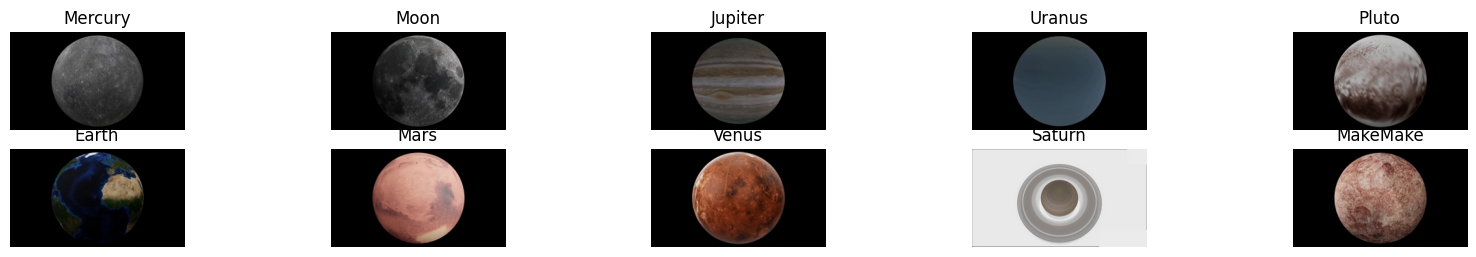

In [3]:
def displayRandomImagesFromEveryFolder(directory=path, samplesPerFolder=1):

    fig = plt.figure(figsize=(20,15))

    for rowIndex in range(0,10 ):
        subdirectory = str(rowIndex)
        path = directory/labels[rowIndex -1]
        images = os.listdir(path)
        for sampleIndex in range(1,samplesPerFolder+1):
            randomNumber = random.randint(0, len(images)-1)
            image = Image.open(path/images[randomNumber])
            ax = fig.add_subplot(10, 5, samplesPerFolder*rowIndex + sampleIndex)
            ax.axis("off")

            plt.title(str(labels[rowIndex -1]))
            plt.imshow(image, cmap='gray')

    plt.show()

displayRandomImagesFromEveryFolder()

In [4]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = os.path.join("/kaggle/input/planets-and-moons-dataset-ai-in-space/Planets_Moons_Data/Planets and Moons", label)  # Use os.path.join for proper path concatenation
    folder_data = os.listdir(path)  # List of all images in the folder
    
    for image_path in folder_data:
        full_image_path = os.path.join(path, image_path)  # Full image path
        image = cv2.imread(full_image_path)  # Read image
        if image is not None:  # Check if the image is loaded properly
            image_resized = cv2.resize(image, (228, 228))  # Resize image to 64x64
            x_data.append(np.array(image_resized))  
            y_data.append(label) 
        else:
            print(f"Warning: Image {full_image_path} could not be loaded.")

In [5]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [6]:
x_data = x_data.astype('float32')/255

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(y_data)
#from keras.utils import to_categorical
y_categorical = to_categorical(y_encoded)

In [9]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [11]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.datasets import cifar10
import time
from tensorflow import keras

In [12]:
input_shape=(228,228,3)
def create_lenet():
    model = models.Sequential()
    model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape))
    model.add(layers.AveragePooling2D(pool_size=(2, 2))) 
    
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))  
    
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='tanh'))
    model.add(layers.Dense(84, activation='tanh'))
    model.add(layers.Dense(11, activation='softmax'))
    return model

lenet = create_lenet()
lenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
def create_alexnet():
    model = models.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(11, activation='softmax'))
    return model

alexnet = create_alexnet()
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
from tensorflow.keras.optimizers import Adam
vgg = VGG16(weights=None, include_top=True, input_shape=input_shape, classes=11)
vgg.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
resnet = ResNet50(weights=None, include_top=True, input_shape=input_shape, classes=11)
resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
models_to_compare = {'LeNet': lenet, 'AlexNet': alexnet, 'VGG-16': vgg, 'ResNet-50': resnet}

for model_name, model in models_to_compare.items():
    print(f"\nModel: {model_name}")
    model.summary()
    print(f"Number of Parameters: {model.count_params()}")



Model: LeNet


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 112, 112, 6)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 108, 108, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 54, 54, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     5,598,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 11)             │           935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,612,811 (21.41 MB)

 Trainable params: 5,612,811 (21.41 MB)

 Non-trainable params: 0 (0.00 B)

Number of Parameters: 5612811

Model: AlexNet


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │        45,067 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,326,411 (222.50 MB)

 Trainable params: 58,326,411 (222.50 MB)

 Non-trainable params: 0 (0.00 B)

Number of Parameters: 58326411

Model: VGG-16


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 228, 228, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 228, 228, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 228, 228, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 114, 114, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 114, 114, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 114, 114, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 57, 57, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 57, 57, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 57, 57, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 57, 57, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 11)             │        45,067 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,305,611 (512.34 MB)

 Trainable params: 134,305,611 (512.34 MB)

 Non-trainable params: 0 (0.00 B)

Number of Parameters: 134305611

Model: ResNet-50


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 228, 228,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 234, 234,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 114, 114,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 114, 114,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 114, 114,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 116, 116,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 57, 57,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 57, 57,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 57, 57,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 57, 57,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 57, 57,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 57, 57,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 57, 57,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 57, 57,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 57, 57,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 57, 57,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 57, 57,    │      1,024 │ conv2_block1_3_c

 Total params: 23,610,251 (90.07 MB)

 Trainable params: 23,557,131 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

Number of Parameters: 23610251


In [17]:
from tensorflow.keras.callbacks import EarlyStopping
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
# Dictionary to store training history for each model
history_dict = {}

# Train each model and store the history
for model_name, model in models_to_compare.items():
    print(f"\nTraining {model_name}...")
    start_time = time.time()
    
    # Train the model with early stopping and store history
    history = model.fit(X_train, Y_train, 
                        epochs=100,  # Max epochs, training may stop earlier due to EarlyStopping
                        batch_size=16, 
                        validation_data=(X_test, Y_test), 
                        verbose=1, 
                        callbacks=[early_stopping])  # Add EarlyStopping callback
    end_time = time.time()
    
    print(f"Training time for {model_name}: {end_time - start_time:.2f} seconds")
    
    # Save the history for plotting later
    history_dict[model_name] = history


Training LeNet...
Epoch 1/100


I0000 00:00:1727969478.966239      78 service.cc:145] XLA service 0x7ff140002510 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727969478.966321      78 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


16/82 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1655 - loss: 2.9611

I0000 00:00:1727969484.313357      78 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


82/82 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.3705 - loss: 2.0862 - val_accuracy: 0.8506 - val_loss: 0.7242
Epoch 2/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8090 - loss: 0.6428 - val_accuracy: 0.8293 - val_loss: 0.5389
Epoch 3/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8138 - loss: 0.5323 - val_accuracy: 0.8628 - val_loss: 0.3959
Epoch 4/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8866 - loss: 0.3607 - val_accuracy: 0.9390 - val_loss: 0.2808
Epoch 5/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8814 - loss: 0.3327 - val_accuracy: 0.8598 - val_loss: 0.3100
Epoch 6/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8885 - loss: 0.2958 - val_accuracy: 0.9543 - val_loss: 0.1948
Epoch 7/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8959 - loss: 0.2842 - val_accuracy: 0.9238 - val_loss: 0.2165
Epoch 8/100
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9308 - loss: 0.1905 - val_accuracy: 0.8628 - val_

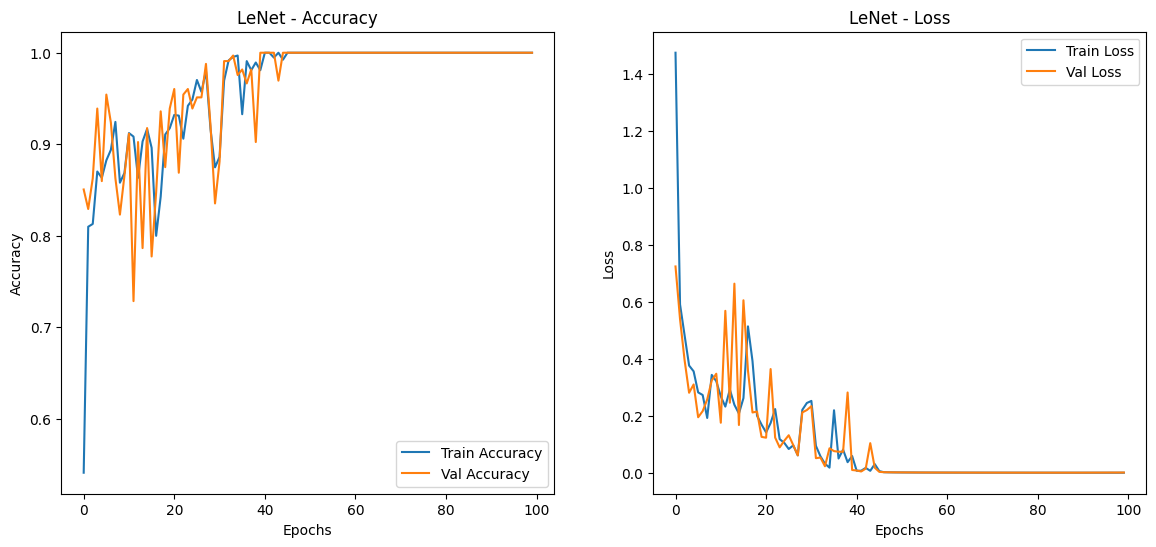

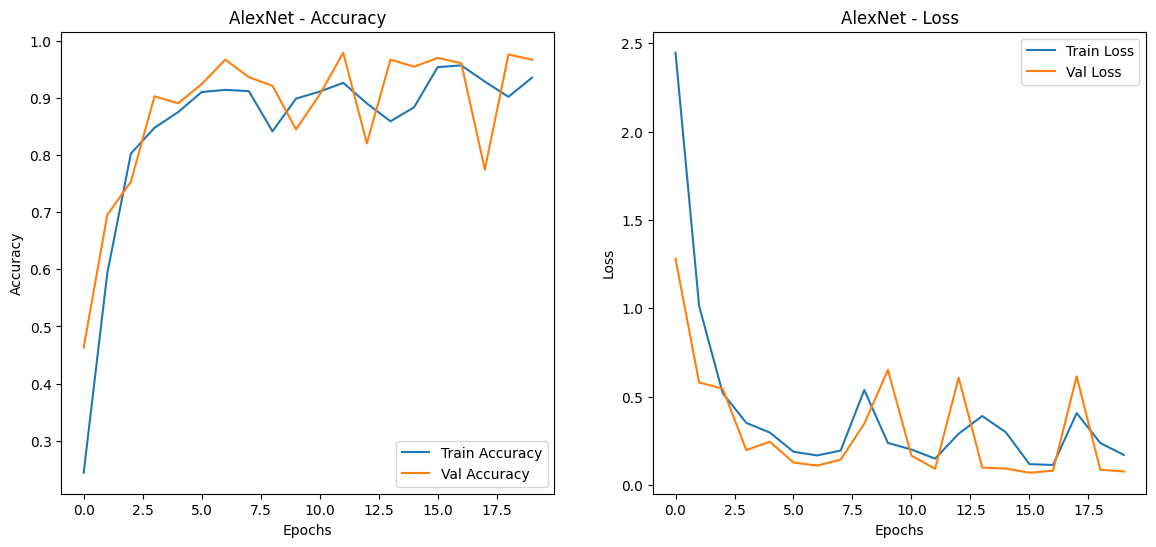

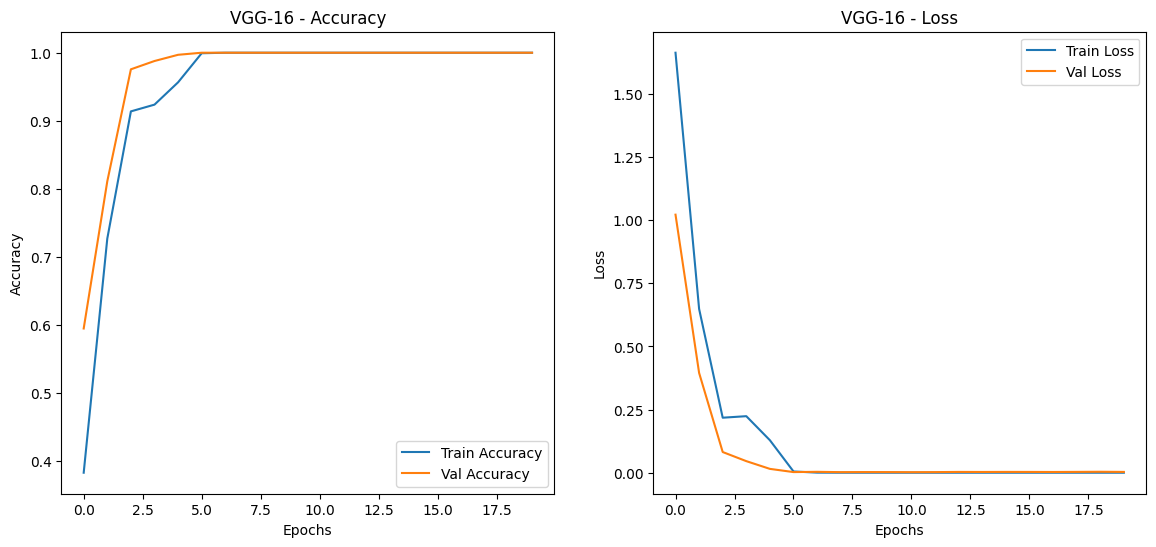

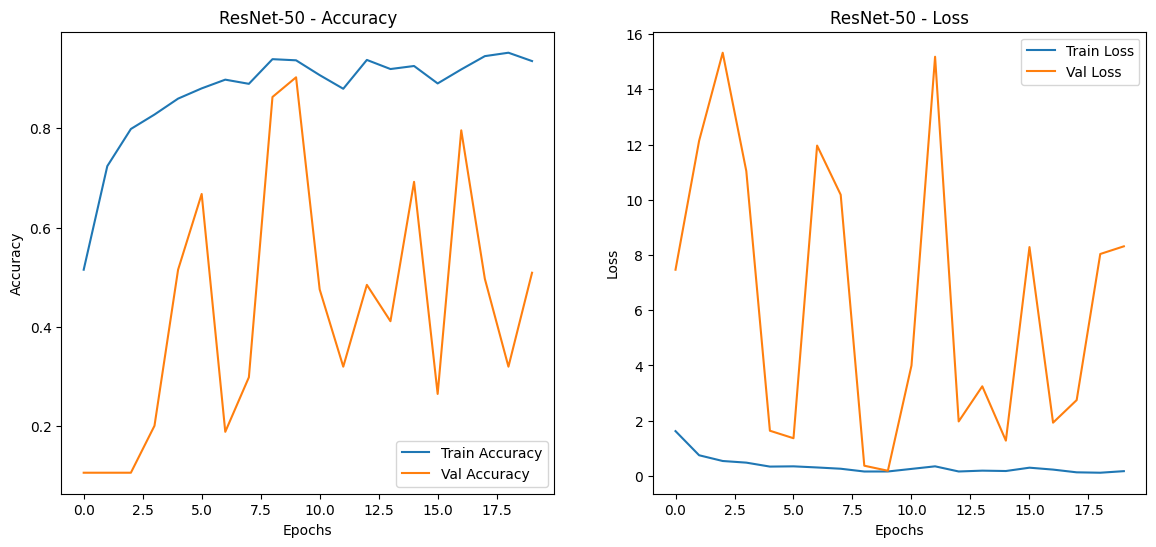

In [18]:
# Function to plot accuracy and loss for each model
def plot_metrics_separately(history_dict):
    for model_name, history in history_dict.items():
        # Create a figure with two subplots: one for accuracy, one for loss
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Plot accuracy for training and validation
        ax1.plot(history.history['accuracy'], label='Train Accuracy')
        ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
        ax1.set_title(f'{model_name} - Accuracy')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Accuracy')
        ax1.legend()

        # Plot loss for training and validation
        ax2.plot(history.history['loss'], label='Train Loss')
        ax2.plot(history.history['val_loss'], label='Val Loss')
        ax2.set_title(f'{model_name} - Loss')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Loss')
        ax2.legend()

        # Show the plots
        plt.show()

# Plot the accuracy and loss for each model separately
plot_metrics_separately(history_dict)